In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [21]:
# Load Dataset
df = pd.read_csv("bankstatements.csv")

# Display first few rows
print("Dataset Preview:")
display(df.head())

# Check dataset info
df.info()

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

Dataset Preview:


,date,DrCr,amount,balance,mode,name,Day,Month,Year,Tday
0,2022-01-01,Db,10000.0,473292.87,ATM,NaN,1,1,2022,1
1,2022-01-01,Db,10000.0,463292.87,ATM,NaN,1,1,2022,1
2,2022-01-02,Db,930.0,462362.87,UPI,AYUBRAJE,2,1,2022,2
3,2022-01-07,Db,2000.0,460362.87,UPI,ABUTALAH,7,1,2022,3
4,2022-01-10,Db,1000.0,459362.87,UPI,AGRAWALB,10,1,2022,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     509 non-null    object 
 1   DrCr     509 non-null    object 
 2   amount   509 non-null    float64
 3   balance  509 non-null    float64
 4   mode     509 non-null    object 
 5   name     370 non-null    object 
 6   Day      509 non-null    int64  
 7   Month    509 non-null    int64  
 8   Year     509 non-null    int64  
 9   Tday     509 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 39.9+ KB


Missing Values:
date         0
DrCr         0
amount       0
balance      0
mode         0
name       139
Day          0
Month        0
Year         0
Tday         0
dtype: int64
Number of duplicate rows: 1


<ipython-input-22-dbb418fee60d>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill missing values


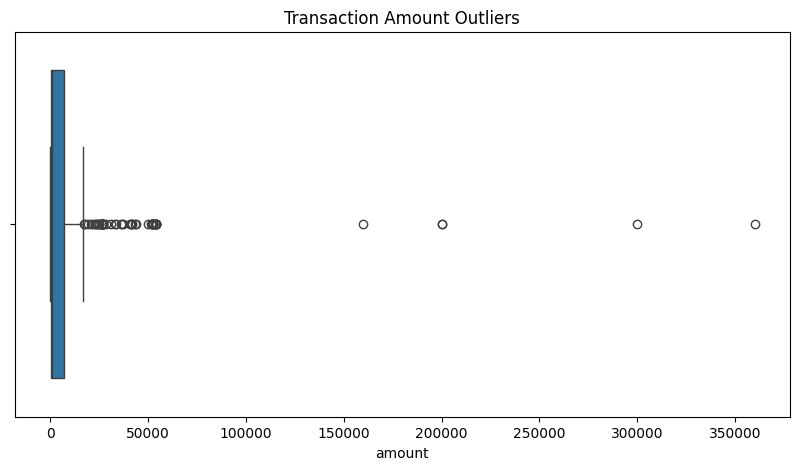

In [22]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
df.drop_duplicates(inplace=True)

# Identify outliers using box plot
plt.figure(figsize=(10,5))
sns.boxplot(x=df['amount'])
plt.title("Transaction Amount Outliers")
plt.show()

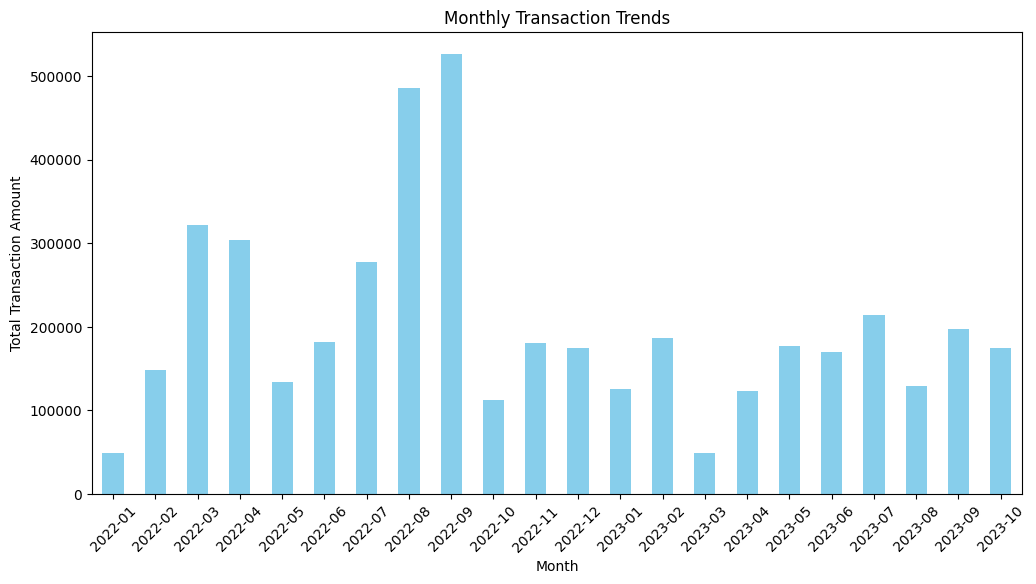

In [23]:
# Transaction pattern analysis
# Monthly transaction trends
df['Month'] = df['date'].dt.to_period('M')
monthly_trends = df.groupby('Month')['amount'].sum()

plt.figure(figsize=(12,6))
monthly_trends.plot(kind='bar', color='skyblue')
plt.title("Monthly Transaction Trends")
plt.xlabel("Month")
plt.ylabel("Total Transaction Amount")
plt.xticks(rotation=45)
plt.show()

In [24]:

# Identifying recurring transactions
recurring_transactions = df.groupby(['DrCr', 'name'])['amount'].mean()
print("Recurring Transactions:")
print(recurring_transactions)


Recurring Transactions:
DrCr  name     
Cr    1MGHEALT       169.960000
      ABUTALAH     31176.930526
      ADINATHM         7.090000
      AGRAWALB      2400.000000
      AMAZONPAY    41699.000000
                       ...     
Db    STATEBAN     13200.000000
      SUNILKA       5288.888889
      SUNILSHA       225.000000
      UTTAMRAJ       236.000000
      VINAYAKV      3020.000000
Name: amount, Length: 105, dtype: float64


In [25]:
# Financial Health Assessment
income = df[df['amount'] > 0]['amount'].sum()
expenses = df[df['amount'] < 0]['amount'].sum()
savings = income + expenses
savings_rate = savings / income

print(f"Total Income: ${income:.2f}")
print(f"Total Expenses: ${expenses:.2f}")
print(f"Savings: ${savings:.2f}")
print(f"Savings Rate: {savings_rate:.2%}")

Total Income: $4441854.58
Total Expenses: $0.00
Savings: $4441854.58
Savings Rate: 100.00%


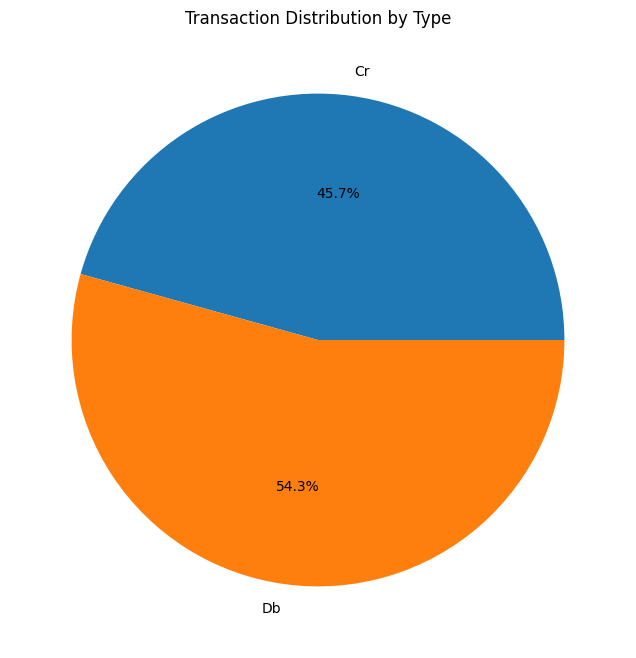

In [26]:
# Data Visualization
plt.figure(figsize=(8,8))
df.groupby('DrCr')['amount'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title("Transaction Distribution by Type")
plt.ylabel("")
plt.show()

In [27]:
# Save the cleaned dataset
# df.to_csv("cleaned_bankstatements.csv", index=False)

print("Analysis complete. Report and visuals generated.")

Analysis complete. Report and visuals generated.


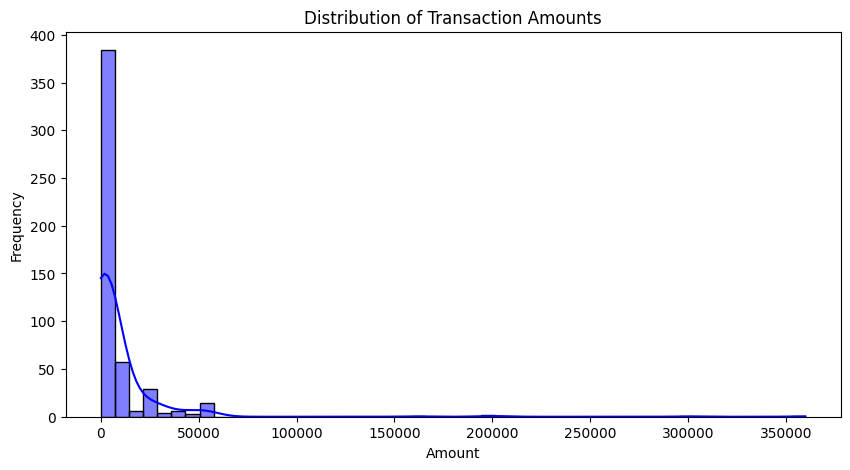

In [28]:
# Distribution of transaction amounts
plt.figure(figsize=(10, 5))
sns.histplot(df['amount'], bins=50, kde=True, color='blue')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

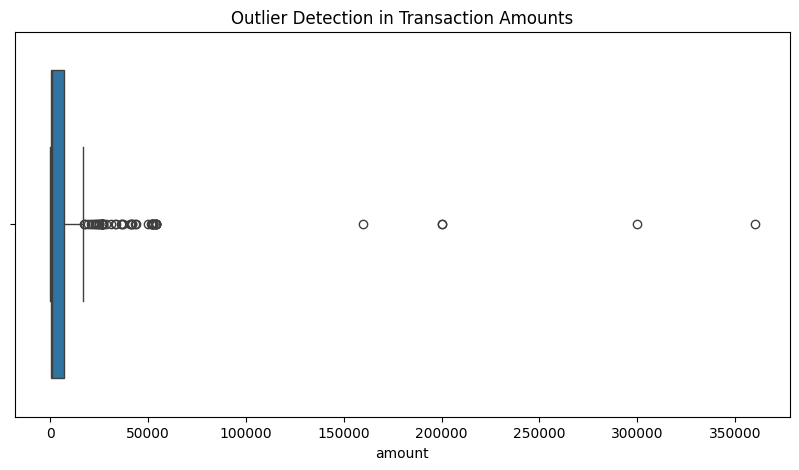

In [29]:
# Box plot to identify outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['amount'])
plt.title("Outlier Detection in Transaction Amounts")
plt.show()

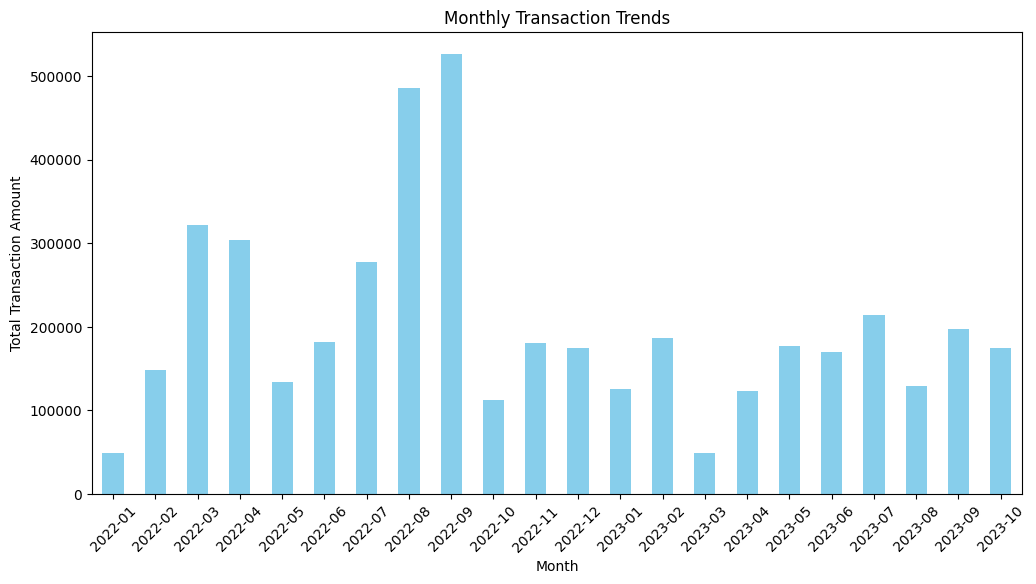

In [30]:

# Monthly transaction trends
df['Month_Year'] = df['date'].dt.to_period('M')
monthly_trends = df.groupby('Month_Year')['amount'].sum()

plt.figure(figsize=(12, 6))
monthly_trends.plot(kind='bar', color='skyblue')
plt.title("Monthly Transaction Trends")
plt.xlabel("Month")
plt.ylabel("Total Transaction Amount")
plt.xticks(rotation=45)
plt.show()












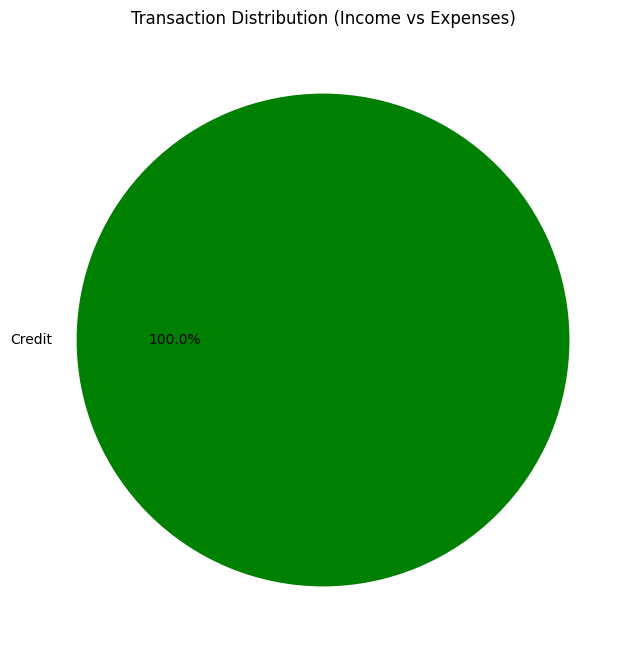

In [31]:
# Categorizing transactions as income and expenses
df['Transaction_Type'] = np.where(df['amount'] > 0, 'Credit', 'Debit')

# Pie chart for transaction distribution
plt.figure(figsize=(8, 8))
df.groupby('Transaction_Type')['amount'].sum().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'])
plt.title("Transaction Distribution (Income vs Expenses)")
plt.ylabel("")
plt.show()


In [32]:
# Identify recurring transactions
recurring_transactions = df.groupby(['Transaction_Type', 'name'])['amount'].mean()
print("\nRecurring Transactions:")
print(recurring_transactions.sort_values(ascending=False).head(10))



Recurring Transactions:
Transaction_Type  name     
Credit            KIRNAKUMA    100000.500000
                  BANKACCO      25953.000000
                  HDFCBANK      25875.909091
                  STATEBAN      23030.250000
                  MOMAHADHU     22164.500000
                  AMAZONPAY     21124.000000
                  SANGALLI      18844.272727
                  ABDULHAME     18500.000000
                  DADAKHALA     15004.066667
                  HESCOMBI      13328.000000
Name: amount, dtype: float64


In [33]:
# Financial Health Assessment
total_income = df[df['amount'] > 0]['amount'].sum()
total_expenses = df[df['amount'] < 0]['amount'].sum()
savings = total_income + total_expenses  # Expenses are negative, so addition results in correct savings
savings_rate = (savings / total_income) * 100 if total_income != 0 else 0


In [34]:
print(f"\nTotal Income: ${total_income:.2f}")
print(f"Total Expenses: ${total_expenses:.2f}")
print(f"Savings: ${savings:.2f}")
print(f"Savings Rate: {savings_rate:.2f}%")



Total Income: $4441854.58
Total Expenses: $0.00
Savings: $4441854.58
Savings Rate: 100.00%


Dataset Preview:


,date,DrCr,amount,balance,mode,name,Day,Month,Year,Tday
0,2022-01-01,Db,10000.0,473292.87,ATM,NaN,1,1,2022,1
1,2022-01-01,Db,10000.0,463292.87,ATM,NaN,1,1,2022,1
2,2022-01-02,Db,930.0,462362.87,UPI,AYUBRAJE,2,1,2022,2
3,2022-01-07,Db,2000.0,460362.87,UPI,ABUTALAH,7,1,2022,3
4,2022-01-10,Db,1000.0,459362.87,UPI,AGRAWALB,10,1,2022,4



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     509 non-null    object 
 1   DrCr     509 non-null    object 
 2   amount   509 non-null    float64
 3   balance  509 non-null    float64
 4   mode     509 non-null    object 
 5   name     370 non-null    object 
 6   Day      509 non-null    int64  
 7   Month    509 non-null    int64  
 8   Year     509 non-null    int64  
 9   Tday     509 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 39.9+ KB

Summary Statistics:
              amount        balance         Day       Month         Year  \
count     509.000000     509.000000  509.000000  509.000000   509.000000   
mean     8736.453006  115873.671493   13.569745    6.163065  2022.489194   
std     27181.105774  136850.421744    9.168241    3.282459     0.500375   
min         1.000000       0.130000 

<ipython-input-35-cbee87fb807b>:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


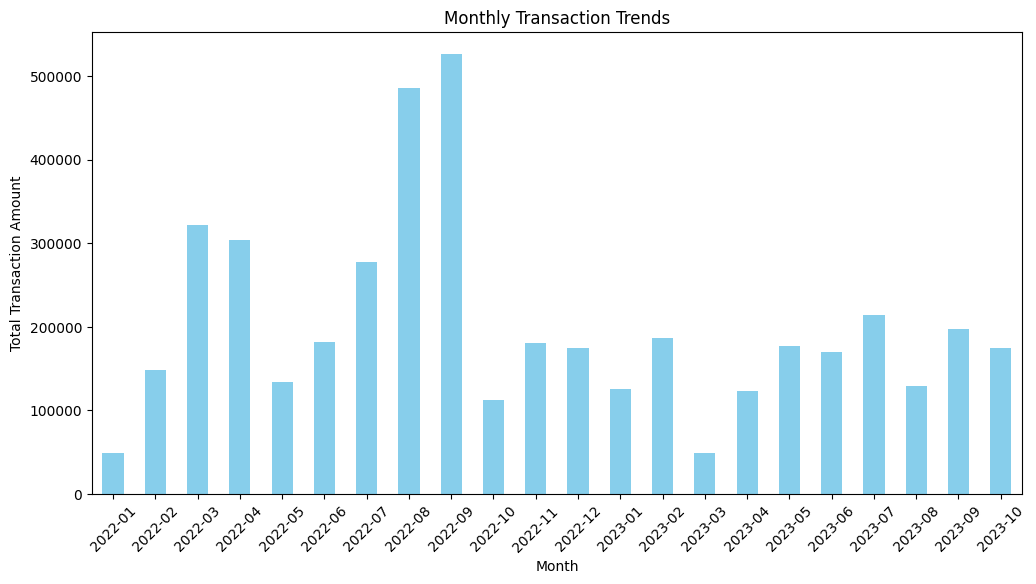


Total Income: $4441854.58
Total Expenses: $0.00
Savings: $4441854.58
Savings Rate: 100.00%

Exploratory Data Analysis Complete! 🚀


In [35]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the dataset
df = pd.read_csv("bankstatements.csv")

# Display the first few rows
print("Dataset Preview:")
display(df.head())

# Check dataset structure
print("\nDataset Info:")
df.info()

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())

# Handle missing values (forward fill method)
df.fillna(method='ffill', inplace=True)

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
df.drop_duplicates(inplace=True)

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Create new columns for better analysis
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day
df['Day_of_Week'] = df['date'].dt.day_name()





# Monthly transaction trends
df['Month_Year'] = df['date'].dt.to_period('M')
monthly_trends = df.groupby('Month_Year')['amount'].sum()

plt.figure(figsize=(12, 6))
monthly_trends.plot(kind='bar', color='skyblue')
plt.title("Monthly Transaction Trends")
plt.xlabel("Month")
plt.ylabel("Total Transaction Amount")
plt.xticks(rotation=45)
plt.show()





# Financial Health Assessment
total_income = df[df['amount'] > 0]['amount'].sum()
total_expenses = df[df['amount'] < 0]['amount'].sum()
savings = total_income + total_expenses  # Expenses are negative, so addition results in correct savings
savings_rate = (savings / total_income) * 100 if total_income != 0 else 0

print(f"\nTotal Income: ${total_income:.2f}")
print(f"Total Expenses: ${total_expenses:.2f}")
print(f"Savings: ${savings:.2f}")
print(f"Savings Rate: {savings_rate:.2f}%")

# Save the cleaned dataset
df.to_csv("cleaned_bankstatements.csv", index=False)

print("\nExploratory Data Analysis Complete! 🚀")
